### Reading in the Data and Pre-processing

In [102]:
import tensorflow as tf
import numpy as np
import keras as keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.cross_validation import StratifiedShuffleSplit
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.regularizers import l1, Regularizer

In [124]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Next to split the dataset for the training and validation:

In [20]:
sss = StratifiedShuffleSplit(y)

In [39]:
for train_index, test_index in sss:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Task 1: Multilayer perceptron
Note: some of the following code was adapted from code presented in class

In [76]:
def make_model(optimizer="adam", hidden_size=32, kernel=0.0001):
    model = Sequential([
        Dense(hidden_size, input_dim=4, activation = 'relu', kernel_regularizer=l1(kernel)),
        Dense(hidden_size, activation = 'relu'),
        Dense(3, activation = 'softmax'),
    ])
    model.compile(optimizer=optimizer,loss="categorical_crossentropy",   
                  metrics=['accuracy'])
    return model

In [77]:
clf = KerasClassifier(make_model)
param_grid = {'kernel': [0.001, 0.01, 0.1],
              'hidden_size': [32, 64, 256]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

Epoch 1/1
90/90 [==============================] - 0s 142us/step
Epoch 1/1
90/90 [==============================] - 0s 173us/step
Epoch 1/1
90/90 [==============================] - 0s 137us/step
Epoch 1/1
90/90 [==============================] - 0s 124us/step
Epoch 1/1
90/90 [==============================] - 0s 199us/step
Epoch 1/1
90/90 [==============================] - 0s 126us/step
Epoch 1/1
90/90 [==============================] - 0s 136us/step
Epoch 1/1
90/90 [==============================] - 0s 128us/step
Epoch 1/1
90/90 [==============================] - 0s 129us/step
Epoch 1/1
90/90 [==============================] - 0s 128us/step
Epoch 1/1
90/90 [==============================] - 0s 126us/step
Epoch 1/1
90/90 [==============================] - 0s 128us/step
Epoch 1/1
90/90 [==============================] - 0s 121us/step
Epoch 1/1
90/90 [==============================] - 0s 1ms/step
Epoch 1/1
90/90 [==============================] - 0s 119us/step
Epoch 1/1
90/90 [==========

GridSearchCV(cv=3, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x1515b64e0>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': [0.001, 0.01, 0.1], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

I'm not quite sure why the accuracy scores are so low, and I played around with the regularization settings but I couldn't get the scores to improve.

In [80]:
grid.best_params_

{'hidden_size': 256, 'kernel': 0.01}

In [81]:
grid.score(X_test,y_test)

15/15 [==============================] - 5s 344ms/step


0.6666666865348816

The final score isn't as high as I would like, or makes sense, considering this was a fairly straightforward task. I fiddled around with the model a bit but I couldn't figure out how to get a higher accuracy score (I didn't show the other models because I interrupted them partway through).

### Task 2: Vanilla vs Drop-out Model on MNIST dataset

First to read in the data

In [82]:
from keras.datasets import mnist

(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()

X_train2 = X_train2.reshape(60000, 784)
X_test2 = X_test2.reshape(10000, 784)
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')
X_train2 /= 255
X_test2 /= 255
print(X_train2.shape[0], 'train samples')
print(X_test2.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train2 = keras.utils.to_categorical(y_train2, num_classes)
y_test2 = keras.utils.to_categorical(y_test2, num_classes)

11493376/11490434 [==============================] - 2s 0us/step
60000 train samples
10000 test samples


Next to set up the vanilla model:

In [109]:
v_model = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax'),
])


v_model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [110]:
history_callback = v_model.fit(X_train2, y_train2, batch_size=128,
                             epochs=100, verbose=1, validation_split=.167)

Train on 49980 samples, validate on 10020 samples
Epoch 1/100
49980/49980 [==============================] - 16s 330us/step - loss: 0.2900 - acc: 0.9159 - val_loss: 0.1273 - val_acc: 0.9646
Epoch 2/100
49980/49980 [==============================] - 5s 104us/step - loss: 0.1105 - acc: 0.9671 - val_loss: 0.0923 - val_acc: 0.9725
Epoch 3/100
49980/49980 [==============================] - 5s 107us/step - loss: 0.0711 - acc: 0.9782 - val_loss: 0.0787 - val_acc: 0.9755
Epoch 4/100
49980/49980 [==============================] - 5s 99us/step - loss: 0.0480 - acc: 0.9853 - val_loss: 0.0786 - val_acc: 0.9754
Epoch 5/100
49980/49980 [==============================] - 5s 100us/step - loss: 0.0381 - acc: 0.9879 - val_loss: 0.0871 - val_acc: 0.9756
Epoch 6/100
49980/49980 [==============================] - 5s 104us/step - loss: 0.0279 - acc: 0.9914 - val_loss: 0.0752 - val_acc: 0.9787
Epoch 7/100
49980/49980 [==============================] - 5s 104us/step - loss: 0.0205 - acc: 0.9937 - val_loss: 0.

49980/49980 [==============================] - 5s 95us/step - loss: 5.3921e-06 - acc: 1.0000 - val_loss: 0.1051 - val_acc: 0.9839
Epoch 60/100
49980/49980 [==============================] - 5s 96us/step - loss: 4.6378e-06 - acc: 1.0000 - val_loss: 0.1053 - val_acc: 0.9838
Epoch 61/100
49980/49980 [==============================] - 5s 95us/step - loss: 4.0104e-06 - acc: 1.0000 - val_loss: 0.1055 - val_acc: 0.9841
Epoch 62/100
49980/49980 [==============================] - 5s 96us/step - loss: 3.4621e-06 - acc: 1.0000 - val_loss: 0.1056 - val_acc: 0.9841
Epoch 63/100
49980/49980 [==============================] - 5s 97us/step - loss: 2.9901e-06 - acc: 1.0000 - val_loss: 0.1060 - val_acc: 0.9841
Epoch 64/100
49980/49980 [==============================] - 5s 97us/step - loss: 2.5853e-06 - acc: 1.0000 - val_loss: 0.1063 - val_acc: 0.9841
Epoch 65/100
49980/49980 [==============================] - 5s 98us/step - loss: 2.2284e-06 - acc: 1.0000 - val_loss: 0.1066 - val_acc: 0.9842
Epoch 66/100

Not surprisingly, the model trains well, with a very high validation score. Next to plot the training and validation accuracy/error rates against number of epochs:

In [111]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

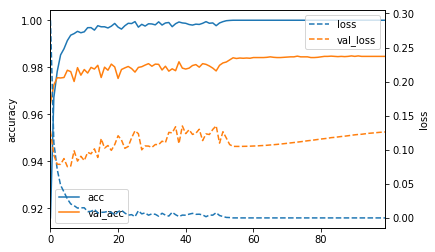

In [112]:
df = pd.DataFrame(history_callback.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.show()

As makes sense the validation score is less than the training score, but both are about 0.98 as num_epochs reaches 100, which is a perfectly acceptable score.

Next to try the model with drop-out:

In [113]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [114]:
history_dropout = model_dropout.fit(X_train2, y_train2, batch_size=128,
                            epochs=20, verbose=1, validation_split=.167)

Train on 49980 samples, validate on 10020 samples
Epoch 1/20
49980/49980 [==============================] - 36s 728us/step - loss: 0.3056 - acc: 0.9056 - val_loss: 0.1302 - val_acc: 0.9596
Epoch 2/20
49980/49980 [==============================] - 27s 537us/step - loss: 0.1469 - acc: 0.9552 - val_loss: 0.0913 - val_acc: 0.9732
Epoch 3/20
49980/49980 [==============================] - 26s 515us/step - loss: 0.1119 - acc: 0.9649 - val_loss: 0.0835 - val_acc: 0.9750
Epoch 4/20
49980/49980 [==============================] - 25s 509us/step - loss: 0.0936 - acc: 0.9710 - val_loss: 0.0780 - val_acc: 0.9763
Epoch 5/20
49980/49980 [==============================] - 25s 504us/step - loss: 0.0819 - acc: 0.9739 - val_loss: 0.0730 - val_acc: 0.9780
Epoch 6/20
49980/49980 [==============================] - 26s 521us/step - loss: 0.0740 - acc: 0.9765 - val_loss: 0.0667 - val_acc: 0.9799
Epoch 7/20
49980/49980 [==============================] - 26s 516us/step - loss: 0.0671 - acc: 0.9788 - val_loss: 0.

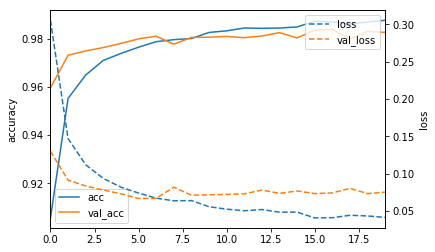

In [117]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.show()

The dropout model also performs well, with validation set out-performing the training set at first, but then plateauing sooner at about 0.98. 

Note to TA's: I decided at this point to run the second half of this homework on Google Cloud in order to cut down on computation time. I was able to run Task 3 successfully but I ran into a disk space issue with Task 4. After researching the issue, I re-sized my disk and then tried to re-size my file system (as instructed by Google Cloud documentation) but was unsuccessful no matter how many different tricks I tried. After that point, I could no longer ssh into my instance (and therefore access my jupyter notebook) and therefore was unable to complete Task 4 due to these issues. I have contacted Professor Mueller about this and tried out his recommendations, such as rebooting the instance (I also tried to re-size the file system from the Google Cloud command line, and found that somehow the disk was now resized to 30GB, which is different from the initial 10GB I started with and the 40GB I had re-sized it to, which is confusing and I don't know how to fix that either). Unfortunately none of these solutions or other Google-produced solutions have worked, and I can't even download the jupyter notebook and convert to a pdf for submission. Therefore, I have decided this might be the best way for you to see the work I did on the second half of the problem set: I have copied all of the code into a .py file and took screenshots of the entire notebook and converted them to a pdf (which I have combined with the pdf of the jupyter notebook for tasks 1 and 2) and will submit the combined pdf on gradescope and the jupyter notebook and .py file on github. I am so sorry for any added stress this puts you through in terms of grading, but this was the only feasible solution that I thought would show you my code and the outputs for Tasks 3 and 4.